### DeRT analysis using Iris dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from kitchen.dert.dert_models import FeatureDrivenModel, CombinedModel
import numpy as np
from nltk.translate.bleu_score import sentence_bleu

Using TensorFlow backend.


In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

In [3]:
trial_2 = CombinedModel()

In [4]:
trial_2.transform_data(X,y)

[['S'], ['S', '4L'], ['S'], ['S', '4L'], ['S'], ['S', '4R'], ['S', '4R', '4R'], ['S', '4R', '4R', '2R'], ['S', '4R', '4R', '2R', '3R'], ['S'], ['S', '4L'], ['S'], ['S', '4R'], ['S', '4R', '4R'], ['S', '4R', '4R', '2L'], ['S'], ['S', '4R'], ['S', '4R', '4L'], ['S', '4R', '4L', '2R'], ['S'], ['S', '4L'], ['S'], ['S', '4R'], ['S', '4R', '4R'], ['S', '4R', '4R', '2L'], ['S'], ['S', '4L'], ['S'], ['S', '4L'], ['S'], ['S', '4L'], ['S'], ['S', '4R'], ['S', '4R', '4L'], ['S', '4R', '4L', '2R'], ['S'], ['S', '4L'], ['S'], ['S', '4L'], ['S'], ['S', '4R'], ['S', '4R', '4R'], ['S', '4R', '4R', '2L'], ['S'], ['S', '4R'], ['S', '4R', '4L'], ['S', '4R', '4L', '2R'], ['S'], ['S', '4R'], ['S', '4R', '4L'], ['S', '4R', '4L', '2R'], ['S'], ['S', '4L'], ['S'], ['S', '4L'], ['S'], ['S', '4R'], ['S', '4R', '4R'], ['S', '4R', '4R', '2L'], ['S'], ['S', '4R'], ['S', '4R', '4R'], ['S', '4R', '4R', '2L'], ['S'], ['S', '4L'], ['S'], ['S', '4R'], ['S', '4R', '4R'], ['S', '4R', '4R', '2L'], ['S'], ['S', '4R'], ['S'

In [12]:
trial_2.df.head()

0                     1                    2  \
0    -1.748856263403368  -0.36217624558027245  -1.3402265266227635   
1  -0.29484181807955345   -0.1319794793216258  0.42173370769893376   
2  -0.29484181807955345    -1.282963310614858  0.08070914621731488   
3     0.310997534138703   -0.1319794793216258   0.4785711346125367   
4   -1.0218490407414607    1.0190043519716065  -1.3970639535363667   

                      3        4  5          6            7               8  
0   -1.3154442950077407    S L E  0     [0, 4]       [-0.7]      [S, 4L, E]  
1    0.3957741007661703  S R L E  1  [0, 4, 3]  [-0.7, 0.6]  [S, 4R, 3L, E]  
2  -0.13075463639503299  S R L E  1  [0, 4, 3]  [-0.7, 0.6]  [S, 4R, 3L, E]  
3    0.2641419164758693  S R L E  1  [0, 4, 3]  [-0.7, 0.6]  [S, 4R, 3L, E]  
4     -1.18381211071744    S L E  0     [0, 4]       [-0.7]      [S, 4L, E]

In [16]:
trial_2.create_model()

In [17]:
trial_2.fit_model()

Train on 120 samples, validate on 30 samples
Epoch 1/2
120/120 [==============================] - 0s 3ms/step - loss: 0.8938 - acc: 0.7250 - val_loss: 1.1378 - val_acc: 0.2667
Epoch 2/2
120/120 [==============================] - 0s 56us/step - loss: 0.7811 - acc: 0.7667 - val_loss: 1.1646 - val_acc: 0.1333
Epoch 1/2
454/454 [==============================] - 1s 1ms/step - loss: 2.5119 - acc: 0.0022
Epoch 2/2
454/454 [==============================] - 0s 31us/step - loss: 2.5012 - acc: 0.0022


In [9]:
trial_2.combined_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
label_ip (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dec_feat_ip (InputLayer)        (None, 4, 10)        0                                            
__________________________________________________________________________________________________
gru_seq (GRU)                   (None, 5)            240         dec_feat_ip[0][0]                
                                                                 label_ip[0][0]                   
__________________________________________________________________________________________________
cat (Concatenate)               (None, 10)           0           label_ip[0][0]                   
          

In [10]:
x = np.array(trial_2.df.iloc[10, 0:4])

In [11]:
' '.join(trial_2.predict(x)[0])

'S 4L E'

In [12]:
trial_2.score()

actual vs predicted:  ['S', '4R', '3L', 'E']  vs  S 4R 3L E labels:  1 1
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 2
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 2
actual vs predicted:  ['S', '4R', '3L', 'E']  vs  S 4R 3L E labels:  1 1
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4R', '3L', 'E']  vs  S 4R 3L E labels:  1 1
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 2
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 2
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 2
actual vs predicted:  ['S', '4R'

actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  1 1
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4R', '3L', 'E']  vs  S 4R 3L E labels:  1 1
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 2
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 2
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 1
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4R', '3L', 'E']  vs  S 4R 3L E labels:  1 1
actual vs predicted:  ['S', '4L', 'E']  vs  S 4L E labels:  0 0
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 2
actual vs predicted:  ['S', '4R', '3R', 'E']  vs  S 4R 3R E labels:  2 2
actual vs predicted:  ['S', '4L'

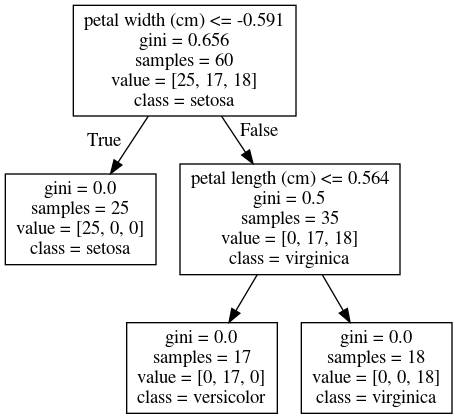

In [13]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(trial_2.clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [26]:
def get_latent_output(x):
    latent_ouput = trial_2.get_hidden_x(x, trial_2.label_model)
    return latent_ouput
for i, val in enumerate(trial_2.df.iloc[:,:4].values):
    print(get_latent_output(val.reshape(1,-1)))

[[ 0.97825533  0.9756276  -0.97883993  0.8924647   0.99205226]]
[[ 0.99698067 -0.9926233  -0.9974675  -0.98704225 -0.99444956]]
[[ 0.99772984 -0.92523897 -0.99767643 -0.9067738  -0.9178329 ]]
[[ 0.98676085  0.99010926 -0.9805231   0.93512166  0.997256  ]]
[[-0.99251074  0.9998997   0.99484044  0.998504    0.9996679 ]]
[[ 0.9862818   0.99683315 -0.97586066  0.9685359   0.99919593]]
[[-0.9925189   0.9998985   0.99449515  0.9985383   0.9996871 ]]
[[-0.98998946  0.99982065  0.98933756  0.9987407   0.99978244]]
[[-0.99150205  0.9998674   0.9925707   0.99852604  0.99971914]]
[[ 0.9972584  -0.93793243 -0.9974701  -0.911661   -0.93609387]]
[[-0.9863217   0.99979335  0.984758    0.9986852   0.99980384]]
[[ 0.9972147  -0.98768497 -0.9974268  -0.97997856 -0.98988885]]
[[-0.98771185  0.99983513  0.98746026  0.9986349   0.9997989 ]]
[[ 0.9976686  -0.98869616 -0.99799085 -0.9772323  -0.98900944]]
[[ 0.9760844   0.9938235  -0.95812696  0.9455795   0.99779   ]]
[[ 0.9917481   0.97988766 -0.9880173   0

[[-0.98781335  0.99983674  0.98758113  0.99863535  0.99980193]]
[[ 0.9953212  -0.44805494 -0.9952722  -0.53392804 -0.3197371 ]]
[[ 0.9959107  -0.996873   -0.99678123 -0.9932362  -0.998178  ]]
[[-0.9925508  0.9999068  0.9948385  0.9986516  0.9996889]]
[[ 0.99493647  0.97534704 -0.99130255  0.8678305   0.9908705 ]]
[[ 0.9917638   0.9643516  -0.9881348   0.8398274   0.98752195]]
[[ 0.9969013  -0.9897568  -0.99732244 -0.98402345 -0.99230397]]
[[ 0.9980155  -0.98444194 -0.9982853  -0.971825   -0.98473734]]
[[-0.9932056   0.9998853   0.99442554  0.9985769   0.9996865 ]]
[[ 0.9896866   0.98640805 -0.9811912   0.90329474  0.9951174 ]]
[[ 0.99649554 -0.94913006 -0.9969399  -0.9218032  -0.9565368 ]]
[[ 0.99750495 -0.4759737  -0.99710983 -0.5853776  -0.355013  ]]
[[-0.9919353   0.99989015  0.9940102   0.9984419   0.9996871 ]]
[[ 0.9963932   0.33780494 -0.99583286 -0.00458808  0.58405924]]
[[ 0.9958606   0.94581664 -0.99343646  0.7765822   0.9746366 ]]
[[-0.9894554   0.9998486   0.9897509   0.9986

In [43]:
trial_2.paths_maxlen

4

In [50]:
x_pred_0 = [[1,1,-1,1,1]]
x_pred_1 = [[1,1,-1,1,1]]
x_pred_2 = [[-1,1,1,1,1]]

In [49]:
trial_2.char_indices

{'S': 0,
 'E': 1,
 '1L': 2,
 '1R': 3,
 '2L': 4,
 '2R': 5,
 '3L': 6,
 '3R': 7,
 '4L': 8,
 '4R': 9}

In [55]:
x_path = np.zeros((1, 4, 10), dtype=np.bool)

x_path[0, 0, trial_2.char_indices['S']] = 1

x_latent = get_latent_output(trial_2.df.iloc[0,:4].values.reshape(1,-1))

np.argmax(trial_2.combined_model.predict([x_pred_2, x_path]).reshape(-1,1))

8

In [42]:
trial_2.combined_model.get_weights()[4]

array([-0.6034861 ,  0.3128876 , -0.54217464, -0.56485444, -0.5967754 ,
       -0.51077825,  0.08852736,  0.42053652, -0.19759612,  0.51593435],
      dtype=float32)

In [22]:
trial_2.combined_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
label_ip (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dec_feat_ip (InputLayer)        (None, 4, 10)        0                                            
__________________________________________________________________________________________________
gru_seq (GRU)                   (None, 5)            240         dec_feat_ip[0][0]                
                                                                 label_ip[0][0]                   
__________________________________________________________________________________________________
cat (Concatenate)               (None, 10)           0           label_ip[0][0]                   
          

In [58]:
trial_2.combined_model.save_weights('../../data/raw/combined_model_weights')

---

### DeRT analysis using Adult Income Dataset

In [10]:
import pandas as pd

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
         'hours-per-week', 'native-country', 'target']

data = pd.read_csv('../../data/raw/adult.data.csv', delimiter=",", header=None, names=names)

In [7]:
data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  target  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [13]:
print(len(np.unique(data['workclass'])))
print(len(np.unique(data['education'])))
print(len(np.unique(data['marital-status'])))
print(len(np.unique(data['occupation'])))
print(len(np.unique(data['relationship'])))
print(len(np.unique(data['race'])))
print(len(np.unique(data['native-country'])))

9
16
7
15
6
5
42


In [11]:
import numpy as np
data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native-country"] != "?"]

# Convert categorical fields #
categorical_col = ['workclass', 'education', 'marital-status', 'occupation',
                   'relationship', 'race', 'sex', 'native-country', 'target']

categorical_col = ['target']
    
# for col in categorical_col:
#     categories = unique_of(data.col)
#     num_cat = count(categories)
#     for cat in categories:
#         data.col[cat] = index_of(cat in categories)

for col in categorical_col:
    b, c = np.unique(data[col], return_inverse=True)
    data[col] = c

feature_list = names[:14]
# Test train split #
X = data.loc[:, feature_list]
Y = data[['target']]

# Split the dataset into test and train datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=0)

In [15]:
import category_encoders as ce

cat_enc = ce.CatBoostEncoder()

X = cat_enc.fit_transform(X, Y)

In [16]:
X.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39   0.240810   77516   0.240810             13        0.240810   
1   50   0.240810   83311   0.120405             13        0.240810   
2   38   0.240810  215646   0.240810              9        0.240810   
3   53   0.120405  234721   0.240810              7        0.120405   
4   28   0.080270  338409   0.080270             13        0.080270   

   occupation  relationship      race       sex  capital-gain  capital-loss  \
0    0.240810      0.240810  0.240810  0.240810          2174             0   
1    0.240810      0.240810  0.120405  0.120405             0             0   
2    0.240810      0.120405  0.080270  0.080270             0             0   
3    0.120405      0.120405  0.240810  0.060202             0             0   
4    0.240810      0.240810  0.120405  0.240810             0             0   

   hours-per-week  native-country  
0              40        0.240810  
1              13        0.120405  
2              40        0.080270  
3              40        0.060202  
4              40        0.240810

In [8]:
trial_3.df.shape

NameError: name 'trial_3' is not defined

In [15]:
X.values

array([[    39,      7,  77516, ...,      0,     40,     39],
       [    50,      6,  83311, ...,      0,     13,     39],
       [    38,      4, 215646, ...,      0,     40,     39],
       ...,
       [    58,      4, 151910, ...,      0,     40,     39],
       [    22,      4, 201490, ...,      0,     20,     39],
       [    52,      5, 287927, ...,      0,     40,     39]])

In [17]:
Y.values.reshape([-1,])

array([0, 0, 0, ..., 0, 0, 1])

In [20]:
trial_3 = CombinedModel()

In [21]:
trial_3.transform_data(X.values,Y.values.reshape([-1,]))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
trial_3.df.head()

0  1       2   3   4  5   6  7  8  9     10 11  12  13  \
0  36  0  370585  11   9  2   0  0  2  1     0  0  40  39   
1  63  0  334741  11   9  2   0  0  4  1     0  0  20  39   
2  44  6  231348  15  10  2   8  0  4  1     0  0  40  39   
3  27  2  162404  11   9  4  11  1  2  1  2174  0  40  39   
4  31  4   49923  11   9  2  14  0  4  1     0  0  40  39   

                                            14  15  \
0  S L L L R L R R L L L R R R L R R L L L L E   0   
1                      S L L L R L R L L L R E   0   
2          S L L L R L R R R R R R L L R R L E   1   
3                S R L L L L L L L L R L L R E   0   
4            S L L L R L L L R R L L R R R L E   0   

                                                  16  \
0  [0, 8, 5, 11, 5, 12, 1, 13, 5, 1, 13, 3, 3, 3,...   
1               [0, 8, 5, 11, 5, 12, 1, 13, 5, 7, 9]   
2  [0, 8, 5, 11, 5, 12, 1, 13, 5, 2, 3, 3, 3, 3, ...   
3      [0, 8, 11, 8, 5, 13, 12, 1, 6, 5, 3, 3, 1, 6]   
4  [0, 8, 5, 11, 5, 12, 1, 5, 1, 7, 13, 3, 3, 9, ...   

                                                  17  \
0  [0.5, 12.5, 5095.5, 8.5, 1794.0, 33.5, 33.5, 9...   
1  [0.5, 12.5, 5095.5, 8.5, 1794.0, 33.5, 33.5, 9...   
2  [0.5, 12.5, 5095.5, 8.5, 1794.0, 33.5, 33.5, 9...   
3  [0.5, 7073.5, 4.5, 13.5, 44.5, 2218.5, 32.5, 5...   
4  [0.5, 12.5, 5095.5, 8.5, 1794.0, 33.5, 9.5, 28...   

                                                  18  
0  [S, 8L, 5L, 11L, 5R, 12L, 1R, 13R, 5L, 1L, 13L...  
1  [S, 8L, 5L, 11L, 5R, 12L, 1R, 13L, 5L, 7L, 9R, E]  
2  [S, 8L, 5L, 11L, 5R, 12L, 1R, 13R, 5R, 2R, 3R,...  
3  [S, 8R, 11L, 8L, 5L, 13L, 12L, 1L, 6L, 5L, 3R,...  
4  [S, 8L, 5L, 11L, 5R, 12L, 1L, 5L, 1R, 7R, 13L,...

In [6]:
trial_3.create_model()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
trial_3.combined_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
label_ip (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dec_feat_ip (InputLayer)        (None, 40, 30)       0                                            
__________________________________________________________________________________________________
gru_seq (GRU)                   (None, 5)            540         dec_feat_ip[0][0]                
                                                                 label_ip[0][0]                   
__________________________________________________________________________________________________
cat (Concatenate)               (None, 10)           0           label_ip[0][0]                   
          

In [8]:
trial_3.label_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ip_x (InputLayer)            (None, 14)                0         
_________________________________________________________________
hidden_x1 (Dense)            (None, 20)                300       
_________________________________________________________________
hidden_x2 (Dense)            (None, 20)                420       
_________________________________________________________________
hidden_x3 (Dense)            (None, 5)                 105       
_________________________________________________________________
op_x (Dense)                 (None, 2)                 12        
Total params: 837
Trainable params: 837
Non-trainable params: 0
_________________________________________________________________


In [10]:
trial_3.x_path

array([], shape=(0, 44, 30), dtype=bool)

In [7]:
trial_3.fit_model()

Instructions for updating:
Use tf.cast instead.
Train on 26048 samples, validate on 6513 samples
Epoch 1/2
26048/26048 [==============================] - 2s 71us/step - loss: 0.5318 - acc: 0.7766 - val_loss: 0.5152 - val_acc: 0.7886
Epoch 2/2
26048/26048 [==============================] - 1s 51us/step - loss: 0.5433 - acc: 0.7672 - val_loss: 0.5488 - val_acc: 0.7629
Epoch 1/2
506666/506666 [==============================] - 44s 88us/step - loss: 2.5754 - acc: 0.1998
Epoch 2/2
506666/506666 [==============================] - 44s 87us/step - loss: 2.1757 - acc: 0.2784


In [22]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(trial_3.clf, out_file=None, 
                                feature_names=names[:14],  
                                class_names=['1','2'])

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.62147 to fit



In [8]:
trial_3.score()

actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3L', '3L', '5L', '3R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 

/home/shakkeel/anaconda3/envs/test_imly/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3L', '3L', '1R', '1R', '13R', '13R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3R', '14R', '7L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5R', '7R', '14R', '3L', '3L', '1L', '13R', '5L', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11R', '2R', '7L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13L', '5L', '2L', '14L', '1R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3L', '3L', '5L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7L', '7L', '14R', '5L', '3R', '3R', '3L', '3L', '1R', '3L', '3L', '3L', '3L', '3L', '4L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L

actual vs predicted:  ['S', '8R', '11L', '8R', '5R', '7R', '14R', '3L', '3R', '1L', '5L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3L', '2R', '3L', '13L', '13L', '1L', '3R', '1R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13R', '3R', '3R', '3L', '3L', '1R', '7R', '1R', '9R', '12L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5L', '1R', '13L', '13L', '13L', '7L', '1R', '1R', '3L', '3L', '4L', '3L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L

/home/shakkeel/anaconda3/envs/test_imly/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5L', '1R', '13L', '13L', '13L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7L', '2L', '3L', '3L', '3L', '3L', '13L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13R', '5R', '12R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7L', '2L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R'

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7L', '3L', '3L', '3R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L',

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7L', '14L', '6R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7R', '3R', '3R', '1L', '3R', '1L', '7L', '14R', '1R', '1R', '3R', '3R', '3R', '13L', '1L', '3L', '2L', '13R', '1L', '7L', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '1

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8L', '6L', '14R', '5L', '1L', '6L', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13L', '5L', '2L', '14R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1R', '3R', '3R', '2L', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13R', '5R', '12L', '7L', '5L', '3L', '2L', '11L', '3R', '3R', '9L', '4R', '13L', 'E']  vs  S 8L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7L', '3L', '3L', '3L', '13R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7L', '7L', '14R', '5R', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7L', '7L', '14R', '5R', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L'

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1R', '1L', '7L', '3L', '2R', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1R', '2R', '4L', '9R', '3L', '14R', '3R', '3L', '13R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1R', '5L', '7L', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', 

actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7L', '3R', '3L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 1

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3L', '2R', '3L', '13L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', 

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3L', '3L', '3R', '2R', '7R', '1L', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7L', '7L', '14R', '5L', '3R', '3R', '3L', '3R', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3L', '2R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L', '3L', '3L', '3R', '3R', '14R', '3L', '3L', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12R', '12R', '1R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12R', '12L', '1R', '7L', '1L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8R 8R 5L 1L 1L E labels:  1 1
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8L', '6L', '14R', '5L', '1L', '6R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3L', '4R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3L', '2L', '13R', '9R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L

actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13R', '5R', '12L', '7L', '5L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5R', '7R', '14R', '3L', '3R', '1L', '5L', '7L', '3L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8R', '11R', '1R', '3R', '11L', '11L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5L', '11R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3R', '2R', '14R', '3R', '4R', '3R', '13L', '3L', '3L', '1L', '7L', '9L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10L', '11L', '12L', '8L', '2R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1L', '3R', '3R', 'E

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3L', '3L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3R', '14R', '7R', '7L', '4L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7R', '3R', '1L', '3R', '3L', '2R', '3L', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3R', '3R', '3R', '12L', '14R', '3L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R',

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7L', '1R', '3R', '3R', '14R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1R', '5R', '3L', '3R', '9R', '

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1R', '13L', '7L', '12L', '13L', '3L', '1L', '3R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R',

actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1L', '11L', '13L', '2R', '6R', '3R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1L', '13L', '7L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3L', '3R', '1L', '3R', '7R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1L', '13L', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3R', '13R', '13L', '7R', '7L', '1L', '3L'

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7L', '6L', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1R', '13L', '7L', '12L', '13L', '3R', '1L', '3R', '5L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1L', '11L', '13R', '13R', '14R', '13L', '13L', '5L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10L', '11L', '12L', '8L', '2L', '3R', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5L', '11R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1L', '11L', '13L', '2R', '6R', '3R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13R', '5R', '12L', '7L', '5L', '3L', '2L', '11L', '3R', '3R', '9R', '1R', '7R', '1L', '3L', '13L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1L', '13L', '7L', '7L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7L', '1R', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8R', '2L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3R', '13R', '13R', '5L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3R', '11L', '3R', '3R', '13R', '9R', '13L', '1L', '1L', '3R', '2R', '7L', '7L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1R', '7R', '13L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3L', '3L', '1R', '1R', '13L', '7R', '6R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1L', '3R', '3R', '13L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13L', '5L', '2L', '14R', '1L', '1R', '9R', '3L', '13R', '1L', '3R', '1L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11R', '10L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3R', '11L', '3R', '3R', '13R', '9R', '13L', '1L', '1R', '13L', '1R', '7L', '7R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7R', '3L', '3L', '13L', '13L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted: 

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3L', '3L', '3R', '2R', '7R', '1L', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3L', '3L', '1R', '1R', '13R', '13R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3R', '11L', '3R', '3R', '13R', '9R', '13L', '1L', '1R', '13L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3L', '2R', '3L', '13L', '13L', '1L', '3R', '1L', '12L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7L', '1R', '3R', '3R', '14R', '7L', '3L', '3L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3L', '3L', '1L', '4L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10R', '5L', '13R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3R', '3R', '3R', '12L', '14L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1R', '1R', '10L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3L', '2R', '3L', '13R', '13R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '1

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3L', '6L', '7R', '3R', '13L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3L', '6L', '7R', '3R', '13L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1L', '13L', '7L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3R', '5L', '1R', '7L', '1R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7L', '2L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13L', '3L', '3L', '4R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6R', '10L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7L', '3R', '3L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3R', '3

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13R', '7L', '10R', '1R', '1L', '8L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1L', '13R', '7L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13L', '3L', '3L', '4L', '10R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7L', '6L', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1L', '14L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 1

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13R', '3L', '3R', '3L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3L', '2R', '3L', '13L', '13L', '1L', '3L', '3L', '3L', '3L', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7L', '3L', '3L', '3L', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7R', '5L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12

actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5R', '3L', '1R', '3R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1R', '1R', '10R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8R', '2L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7L', '12L', '13R', '3R', '4R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7L', '2L', '3L', '3L', '3L', '3L', '13L', '7

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3R', '3L', '1L', '10R', '2L', '8L', '7L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8R', '2R', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1L', '14R', '3L', '9R', '5L', '5L', '2L', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7L', '13R', '13R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7R', '3R', '3R', '1L', '3R', '1L', '7L', '14R', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6L', '1L', '3R', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10L', '11L', '12L', '8R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3L', '6L', '7R', '3R', '13L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5R', '3L', '1L', '7R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5L', '1R', '13L', '13L', '13L', '7L', '1R', '1R', '3R', 'E']  

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5L', '11L', '3R', '3R', '3L', '3L', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7R', '4R', '7L', '13L', '3L', 'E']  v

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10R', '5R', '6R', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5L', '11L', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5L', '1R', '13R', '5R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 1

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7R', '3R', '1L', '3L', '9R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3R', '11L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3R', '3R', '3L', '14R', '9R', '3L', '3L', '3L', '11L', '3R', '3R', '1R', '1L', '3R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1L', '11L', '13L', '2L', '1R', '7L', '4R', '9L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1R', '5L', '7L', '2R', '3L', '8R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3L', '3L', '3L', '5L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3L', '6L', '7R', '3R', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11R', '2R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3R', '13R', '13R', '5R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8R', '2L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7R', '3L', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 1

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10R', '14L', '7L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11R', '1R', '3R', '11R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7L', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7L', '13R', '13L', '2R', '3L', '3L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3R', '2R', '14R', '3R', '4R', '3R', '13L', '3L', '3L', '1

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7R', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1L', '11L', '13L', '2R', '6R', '3R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7L', '13L', '1L', '7L', '2R', '3R', '3L', '1R', '3R', '3L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3R', '3R', '3R', '12L', '14R', '3L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5R', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5L', '1R', '13L', '13L', '

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7L', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3R', '11L', '3R', '3R', '13R', '9R', '13L', '1L', '1L', '3R', '2R', '7R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3R', '3R', '3L', '14R', '9R', '3L', '3L', '3L', '11L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1R', '13L', '7L', '12L', '13L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13R', '3L', '3R', '3L', '1R', '5L', '7L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1R', '2R', '4L', '9R', '3

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7R', '3R', '3L', '2L', '13L', '13L', '1L', '2R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7L', '3L', '3L', '3R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12R', '3L', '1L', '13R', 'E']  vs  S 8L 5L 5L 5L 

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7R', '3R', '3R', '1R', '7L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7L', '7L', '1R', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7R', '2L', '7R', '3R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
ac

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13R', '1L', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11R', '1R', '3R', '11R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 1

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L', '3L', '3L', '3R', '3R', '14R', '3L', '3L', '13R', '7L', '13L', '13L', '3L', '7L', '7L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1R', '2R', '4L', '9R', '3L', '14R', '3R', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path m

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7L', '13L', '1R', '2R', '3L', '3L', '3R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1L', '14R', '3L', '9R', '5L', '5L', '2L', '3R', '3R', '3R', '3R', '3R', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
a

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8R', '2L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8L', '6L', '14L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1L', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1R', '1R', '10R', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3L', '3L', '3L', '9R', '7R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3R', '13R', '13L', '7L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7L', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7R', '3L', '3L', '13L', '13R', '7L',

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3L', '3R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7L', '13L', '1L', '7L', '2R', '3R', '3

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12R', '3L', '1L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3R', '1L', '3R', '7R', '3R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1L', '3L', 'E']  vs  S

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7L', '1R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7L', '2L', '3L', '3L', '3R', '3R', '3R', '13L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10R', '5L', '13R', '3L', '3L', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L',

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1L', '14R', '3L', '9R', '5L', '5L', '2L', '3R', '3R', '3L', '3L', '7R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3R', '11L', '3R', '3R', '13R', '9R', '13L', '1L', '1L', '3R', '2R', '7R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1L', '13L', '4R', '9R', '3L', '11L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3L', '3L', '5L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7L', '7L', '1L', '3R', '3R', '3L', '2R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L'

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3L', '10L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7L', '7L', '14R', '5R', '11L', '3L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3R', '2L', '13R', '3L', '3L', '7L', '1R', '5L', '14R', '12L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1L', '11L', '13L', '2R', '6R', '3L', '9R', '7L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6R', '10L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', '

actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1R', '2R', '13L', 'E']  vs  S 8R 8R 5L 1L 1L E labels:  1 1
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7L', '13R', '13L', '2R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9R', '3R', '3R', '7L', '1R', '13R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E la

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10L', '11L', '12L', '8R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3L', '3L', '3L', '9R', '7L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5R', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3L', '2R', '3L', '13L', '13L', '1R', '3L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5L', '11L', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13R', '1L', '3L', '13R', '4L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7L', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3R', '14R', '7L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3L', '3L', '5L', '3R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13R', '3L', '13R', '3L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11R', '1R', '3R', '11R', 'E']  vs  S 8R 8R 5L 1L 1L E labels:  1 1
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3L', '9R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7L', '13L', '1L', '7L', '2R', '3R', '3L', '1L', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L', '3L', '3L', '3R', '3R', '14R', '3L', '3L', '13R', '7L', '13L', '13L', '3R', '3R', '7R', '9R', '11L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3R', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3L', '3L', '3R', '3R', '4R', '7L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Pa

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13R', '7R', '5R', '1L', '14L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1R', '1L', '7R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7R', '3R', '3L', '2L', '13L', '13L', '1L', '2R', '3R', 'E']  vs  S 8L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11R', '11R', '3L', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7R', '3R', '3L', '2L', '13L', '13R'

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3L', '4L', '3L', '1R', '7L', '7L', '3L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3L', '3L', '3R', '2R', '7R', '1R', '1L', 'E']  vs

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7R', '3R', '3R', '1L', '3R', '1L', '7L', '14R', '1R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13R', '5R', '12L', '7L', '5L', '3L', '2L', '11L', '3R', '3R', '9R'

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3L', '3L', '3R', '3R', '4L', '9R', '13R', '11L', '3R', '3R', '3R', '3R', '1L', '1R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13R', '1L', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3R', '3R', '3L', '14L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3L', '3L', '3R', '3R', '4L', '9R', '13R', '11L', '3R', '3R', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8R', '2L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9L', '14R', '9L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10R', '5L', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1L', '13L', '7L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L', '3L', '3L', '3R', '3R', '14R', '3R', '4R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13R', '7L', '10R', '1R', '1L', '8L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1R', '13L'

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8L', '6L', '14R', '5R', '10R', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7L', '2L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3R', '2R', '14R', '3R', '4R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5L', '1R', '13L', '13L', '13L', '7L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '1

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3L', '3L', '3R', '3L', '4L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1R', '2R', '4R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs 

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1R', '2R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels: 

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5R', '3L', '1L', '7R', '3L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3L', '3L', '1R', '1R', '13R', '13R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10L', '3L', '3L', '7L', '13R', '3L', '1L', '13R', '1R', '4R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14L', '1R', '3R', '3L', 'E']  vs  S 8L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7L', '6L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13R', '5R', '12L', '7R', '7L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3L', '3L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3L', '13L', '1R', 'E']  vs  S 8L 5L 5L 

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5R', '3L', '1L', '7R', '3L', '13L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7L', '3L', '5L', '1L', '5L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7R', '3L', '3L', '1R', '1R', '2L', '13R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13R', '5R', '12L', '7R', '7L', '3L', '3L', '5R', '14R', '1R', '4L', 'E']  vs  S 8L 5L 5L 5L 5

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8L', '6L', '14R', '5L', '1R', '1R', '7L', '3L', '3R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3R', '1R', '1L', '3R', '3L', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5L', '11L', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7L', '12L', '13L', '11L', '2L', '7L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13L', '3L', '3L', '4R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7R', '5R', '1L', '13L', 'E']  v

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13L', '5L', '11L', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3R', '1L', '3R', '7R', '3R', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13R', '3R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13R', '7R', '5L', '3L', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13L', '3L', '3L', '4R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13L', '3L', '1R', '1R', '4L', '11L', '3R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3R', '13R', '13L', '7R', '7R', '3L', '7R', '4L', '7R', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1L', '14R', '3L', '9R', '5L', '5R', '2R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1R', '1R', '10L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7L', '7L', '1R', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7L', '2L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10R', '14R', '6L', '13L', '1L', '1R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', '

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9L', '14R', '9L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3R', '2R', '14L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9R', '3R', '3L', '7R', '1L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3R', '3R', '3R', '12L', '14R', '3L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5R', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3L', '9R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5L', '2L', '11L', '3L', '3L', '3L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3R', '14R', '7R', '7L', '4L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3L', '6L', '7L', '3R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3R', '3R', '3R', '12L', '14R', '3R', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7L', '3L', '5L', '1L', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7L', '12L', '13L', '11L', '2L', '7L', '1

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13L', '3R', '14R', '13R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7L', '12L', '13L', '11L', '2L', '7L', '1L', '1L', '5L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11R', '1R', '3R', '11R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3R', '11L', '3R', '3R', '13R', '9R', '13L', '1L', '1R', '13L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3L', '3L', '5L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9R', '3R', '3R', '7R', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4R', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10L', '11L', '12L', '8R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13R', '3L', '13R', '3L', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4L', '1R', '14R', '12L', '2L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7R

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3R', '3R', '3R', '12L', '14R', '3L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14L', '1R', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9R', '3L', '13L', '2L', '1L', '13R', '14R', '5L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7L', '7L', '14L', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2L', '1R', '1L', '7L', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3R', '3R', '3L', '14R', '9R', '3L', '3L', '3L', '11L', '3R', '3R', '1R', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1R', '1R', '10

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7R', '3R', '1L', '3R', '3R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1R', '5L', '7L', '2R', '3L', '8R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10R', '14R', '6L', '13L', '1L', '1R', '7L', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5R', '7R', '14R', '3R', '13R', 'E']  vs  S 8L 5L 5

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1R', '5R', '3L', '3R', '9R', '7L', '8L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7L', '7L', '1R', '1L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12R', '12R', '1R', '7R', '5L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L'

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13L', '5R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1R', '13L', '7L', '12L', '13L', '3L', '1L', '3R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7L', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13R', '7R', '5R', '1L', '14L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1R', '13L', '7L', '12L', '13L', '3L', '1L', '3R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7L', '13L', '1L', '7R', '3L', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12R', '12R', '1L', '12L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3L', '3L', '5L', '3R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10L', '3L', '3L', '7L', '13R', '3L', '1L', '13R', '1R', '4L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L', '3L', '3L', '3R', '3R', '14R', '3R', '4R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L'

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9R', '3R', '3R', '7L', '1L', '3R', '3L', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10R', '5L', '13R', '3L', '3L', '1R', '3L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11R', '1R', '3R', '11L', '11L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 1

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12R', '3L', '1L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13L', '3L', '1R', '1R', '4R', '13L', '7L', '2R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1L', '11L', '13L', '2R', '6R', '3L', '9R', '7L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7R', '7R', '3R', '3L', '2L', '13L', '13L', '1L', '2R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7L', '7L', '14R', '5L', '3R', '3R', '3L', '3L', '1R', '3L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3R', '1L', '3R', '7R', '3R', '3R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Pa

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1R', '1R', '10R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10R', '5R', '6R', '1R', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 1

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1R', '2R', '4L', '9R', '3L', '14R', '3R', '3R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7R', '3L', '3L', '13L', '13R', '7L', '13L', '3R', '3R', '3R', '3R', '7R', '3L', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7L', '3R', '3L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3R', '13R', '13L', '7R', '7R', '3L', '7L', '1L', '1R', '1L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1R', '2R', '4R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10R', '5L', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4R', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7L', '7L', '1R', '1L', '3L', '3L', '13L', '2L', '3L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13R', '3R', '3R', '3L', '3R', '13R', '1L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R',

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3L', '3L', '5L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7L', '3R', '3L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7L', '7L', '1L', '3R', '3R', '3R', '3L', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1R', '5R', '3L', '3R', '9R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', 

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4L', '1R', '14R', '12L', '2L', '3L', '3L', '13R', '3R', '1L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10R', '5R', '6R', '1L', '3L', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9R', '3R', '3R', '7

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3L', '2R', '3L', '13L', '13L', '1L', '3R', '1R', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8R', '2L', '1R', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3R', '3R', '3R', '12L', '14R', '3L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3R', '1L', '3R', '7R', '3R', '3R', '3R', '1R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7L', '6L', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L'

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1L', '14R', '3L', '9R', '5L', '5L', '2L', '3R', '3R', '3R', '3R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1R', '13L', '7L', '12L', '13L', '3L', '1L', '3R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10L', '3L', '3L', '7R', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3L', '13L', '1L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L'

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6R', '10L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13R', '3R', '3R', '3L', '3L', '1R', '7R', '1R', '9L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7R', '3L', '3L', '13L', '13L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7R', '5L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3L', '3L', '1R', '1L', '2L', '9R', '1R', '13R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3L', '3L', '3R', '2R', '7R', '1R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13R', '7L', '10R', '1R', '1L', '8R', '12L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3R', '11R', '11L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5L', '1R', '13R', '5R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5L', '3R', '3R', '3R', '12L', '14R', '3R', '3R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4R', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1R', '13L', '7L', '12L', '13L', '3R', '1L', '3R', '5L', '7R', 'E']  vs

actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13R', '5L', '1L', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3L', '3L', '3L', '9R', '7L', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5L', '1R', '13R', '5L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7L', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7L', '6L', '2L', 'E']  vs  S 8L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3R', '13R', '13L', '7L', '3R', '13L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7R', '3R', '1R', '1R', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9R', '3L', '13L', '2L', '1L', '13R', '14R', '5L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actu

actual vs predicted:  ['S', '8R', '11R', '1R', '3R', '11R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1R', '1L', '7L', '3L', '2R', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 1

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7R', '3R', '1R', '1R', '1L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5R', '7R', '14R', '3L', '3L', '1R', '2L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4R', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11R', '1L', '1L', 'E']  vs  S 8R 8R 5L 1L 1L E labels:  

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7R', '5L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1R', '1R', '10R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3R', '2L', '13R', '3L', '3L', '7L', '1R', '5L', '14R', '12L', '7L', 'E']  vs  S 8L 5L 5

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7R', '3L', '3L', '13L', '13R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12R', '9R', 'E']  vs  S 8L 5L 5L 5L 

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3L', '3L', '3L', '9R', '7R', '3L', '3L', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1L', '13L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10R', '5L', '13R', '3L', '3L', '1R', '3L', '3L', '3L', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', 

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7L', '7L', '13L', '1R', '2R', '3L', '3L', '3R', '1L', '2R', '3R', '3R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1L', '3R', '3R', '13L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1R', '7R', '1L', '13L', '4R', '9R', '3L', '11L', '3L', '3L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10L', '11L', '12L', '8R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7L', '2L', '3L', '3L', '3L', '3L', '13L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10L', '3R',

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7L', '7R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4L', '1R', '14R', '12L', '2L', '3L', '3L', '13R', '3R', '1L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11R', '1R', '3R', '11R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7L', '7L', '14R', '5L', '3R

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12R', '12R', '1L', '12L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7R', '3L', '3L', '13L', '13R', '7L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7L', '1L', 'E'

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1R', '2R', '4L', '9R', '3L', '14R', '3R', '3L', '13R', '13R', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1R', '3L', '4L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13L', '3L', '1R', '1R', '4L', '11L', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13R', '7R', '5R', '1L', '14R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13L', '1R', '10L', '11L', '12L', '8L', '2L', '3L', '1L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1R', '3R', '13R', '13L', '7L', '3R', '13L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7R', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7R', '7R', '3R', '1L', '3R', '3L', '2L', '13R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L', '3L', '3L', '3L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', 

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6L', '3R', '6L', '13L', '1R', '5L', '7R', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8L', '6R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4R', '3R', '5R', '9R', '1R', 'E']  vs  S 8L 5L 5L 

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13R', '1R', '3R', '7R', '5R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1R', '1L', '7L', '3L', '2L', '4L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3R', '2L', '13R', '3L', '3L', '7L', '1R', '5L', '14L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L'

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3R', '7L', '2L', '7L', '3L', '3L', '3L', '5L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12R', '12R', '1R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1L', '11L', '13L', '2R', '6R', '3R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7R', '2R', '6L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11R', '1L', '1R', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 1

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3L', '3L', '1R', '1R', '13R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5R', '7R', '14R', '3R', '13L', '1R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5

actual vs predicted:  ['S', '8L', '5R', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3R', '3R', '3L', '14R', '9L', '1L', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5R', '1R', '3L', '6L', '7R', '3R', '13L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11R', '1L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 1

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1L', '3R', '7R', '1R', '3L', '4L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1R', '1R', '10L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8R', '2L', '1R', '1R', '3L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10L', '3L', '3L', '7L', '13L', 'E']  vs  S 8L

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5R', '3R', '12L', '11L', '7L', '7R', '3L', '3L', '13L', '13R', '7L', '13L', '3R', '3R', '3R', '3R', '7R', '3R', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7R', '11L', '8R', '2L', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13L', '5L', '2L', '14R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R',

actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4L', '1R', '14R', '12L', '2L', '3L', '3L', '13R', '3R', '1L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3L', '3R', '3L', '14R', '9R', '7L', '1L', '3L', '13L', '3L', '2R', '3L', '13L', '13L', '1R', '3R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs pred

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1R', '7L', '3R', '3R', '13L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5L', '1R', '13L', '6R', '7R', '14R', '3R', '3R', '7L', '3R', '7L', '2L', '3L', '3L', '3R', '3R', '3R', '13L', '1R', '3L', '3L', '1L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8L', '11L', '7R', '2R', '1R', '3R', '1L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs pred

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7R', '5R', '11L', '10R', '14R', '6L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1R', '3L', '7L', '3R', '3L', '3L', 'E']  vs  S 8L 5L 5

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11R', '2L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8R', '5L', '1R', '13L', '5R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5R', '11L', '6R', '1L', '6L', '12L', '7L', '1R', '1R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5R', '7R', '1L', '3R', '11L', '9R', '3L', '13L', '2L', '1L', '13R', '14L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2R', '5R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5L', '1R', '3L', '13L', '4L', '1R', '14R', '12L', '2L', '3L', '3L', '13R', '3R', '1L', '3R', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1R', '1L', '5L', '3L', '3R', '11L', '

actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7L', '7L', '14R', '5L', '3R', '3R', '3L', '3L', '1R', '3R', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6R', '5L', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7L', '7L', '13L', '2L', '1R', '3L', '3L', '5L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1

actual vs predicted:  ['S', '8R', '11L', '8L', '5R', '13R', '7R', '5L', '3L', '14R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1L', '5L', '13L', '6L', '3R', '1R', '1L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1L', '13L', '3L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1L', '5R', '3L', '1R', '3R', '3R', '2L', '2L', '3R', '2R', '7L', '3L', '3R', '13L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1L', '3L', '7R', '3L', '1L', '14R', '3L', '9R', '5L', '5L', '2L', '3R', '3R', '3R', '3R', '3L', '3R', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13L', '3L', '7R', '13L', '7R', '2L', '7R', '3R', '1L', '3R', '7L', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  1 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13L', '1R', '7L', '7R', '2L', '4L', '7R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L'

actual vs predicted:  ['S', '8L', '5R', '11L', '12L', '13R', '1R', '11L', '1R', '5L', '7L', '1L', '2L', '12L', '3L', '3R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8R', '11L', '8L', '5L', '12L', '13R', '5L', '6R', '1L', '8R', '9R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2R', '7L', '1L', '3L', '3L', '5L', '1R', '13L', '13R', 'E']  vs  S 8L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 5L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 12L 13L 13L 13L 13L E labels:  0 0
 -- Path mismatch -- 
actual vs predicted:  ['S', '8L', '5L', '11L', '5R', '12L', '1R', '13R', '2L', '1L', '13R', '3L', '13R', '3L', '1R', '2R', '3L', 

KeyboardInterrupt: 

In [22]:
trial_3.df.iloc[1,-1][1:-1][3][-1]

'R'

In [16]:
import locale
locale.atoi(trial_3.df.iloc[1,-1][1])

ValueError: invalid literal for int() with base 10: '8R'

---

### Trials

In [15]:
actual_path = trial_2.df.iloc[1, 8]
actual_path_tok = [trial_2.char_indices[char] for char in actual_path]

In [16]:
actual_path_tok

[0, 9, 6, 1]

In [17]:
trial_2.char_indices

{'S': 0,
 'E': 1,
 '1L': 2,
 '1R': 3,
 '2L': 4,
 '2R': 5,
 '3L': 6,
 '3R': 7,
 '4L': 8,
 '4R': 9}

In [22]:
trial_2.get_j_coeff(actual_path_tok, [0,9,6,1])

1.0

In [13]:
import distance
distance.levenshtein(['S', 'L', 'E'],['S', 'L', 'E'])

0

In [14]:
## Extracting failure paths

a = ['S', '4R', '4L', '3L', 'E'] # Actual
b = ['S', '4R', '4L', '3L', 'E'] # Predicted
# Target - 1, versicolor
list(set(a) - set(b)) == [] # order doesn't matter. Lost in BLEU score

## Failure scenarios
# Case 1 - Same path different order.
# Sticking to the order would fail. Should we re-order and then use?
a = ['S', '4R', '4L', '3L', 'E']
b = ['S', '4L', '3L','4R', 'E']

# Case 2 - Different path, right prediction
# Prediction is right but path is entirely different
a = ['S', '4R', '4L', '3L', 'E']
b = ['S', '4R', 'E'] # Not a leaf node !

# Ex actual path - ['S', '4R', '4L', '3L', 'E']
# Perfect match 
# Order mismatch - ['S', '4L', '3L', '4R', 'E'] -- Check at pred level
# Subset of the tree - ['S', '4L','4L','4L' 'E']
# Check the weights of the RNN and latent input 
# Train/test split 

In [68]:
a = ['S', '4R', '4L', '3L', 'E']
b = ['S', '4L', '3L','4R', 'E']

In [66]:
a == b # order matters

False

In [69]:
sorted(a) == sorted(b)

True

In [121]:
test_path = list(''.join(a))[1:-1]

In [122]:
for i in range(len(test_path)):
    if i%2 == 0:
        test_path[i] = int(test_path[i])

In [123]:
test_path

[4, 'R', 4, 'L', 3, 'L']

In [14]:
trial_2.clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

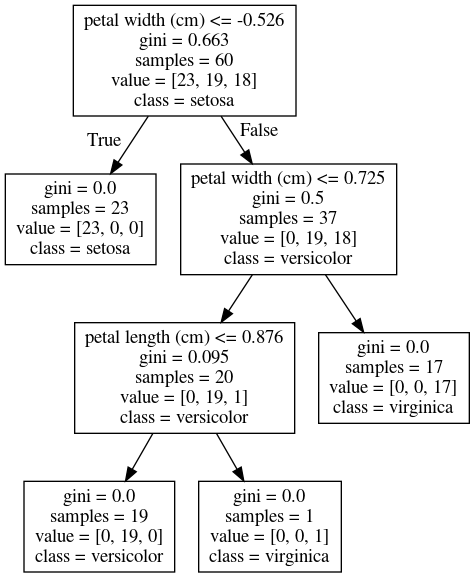

In [15]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(trial_2.clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())



In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
trial_2.clf.tree_.feature

array([ 3, -2,  3,  2, -2, -2, -2])

In [19]:
trial_2.clf.tree_.threshold

array([-0.5256512 , -2.        ,  0.72485456,  0.87643313, -2.        ,
       -2.        , -2.        ])

In [21]:
stack = [(0, -1)]
stack.pop()

(0, -1)

In [23]:
trial_2.clf.tree_.children_left # left nodes

array([ 1, -1,  3,  4, -1, -1, -1])

In [24]:
trial_2.clf.tree_.children_right # right nodes

array([ 2, -1,  6,  5, -1, -1, -1])

In [109]:
pred_path = ['L', 'L', 'R']
pred_features = [4, 3, 4]

In [110]:
n_nodes = trial_2.clf.tree_.node_count
children_left = trial_2.clf.tree_.children_left
children_right = trial_2.clf.tree_.children_right
feature = trial_2.clf.tree_.feature
# threshold = trial_2.clf.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
# node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

# print("The binary tree structure has %s nodes and has "
#       "the following tree structure:"
#       % n_nodes)
# for i in range(n_nodes):
#     if is_leaves[i]:
#         print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
#     else:
#         print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
#               "node %s."
#               % (node_depth[i] * "\t",
#                  i,
#                  children_left[i],
#                  feature[i],
#                  threshold[i],
#                  children_right[i],
#                  ))
        

node = 0
pred_target = -1
for i in range(len(pred_path)):
    if pred_path[i] == 'L':
        if feature[node]+1 == pred_features[i]:
            node = children_left[node]
        else:
            pred_target = -1 # Remove for "subset" checks
            break
    elif pred_path[i] == 'R':
        print(node)
        if feature[node]+1 == pred_features[i]:
            node = children_right[node]
        else:
            pred_target = -1 # Remove for "subset" checks
            break
    if is_leaves[node]:
        for i, x in enumerate(trial_2.clf.tree_.value[node][0]):
            if x > 0:
                pred_target = i

In [111]:
pred_target

-1

In [26]:
feature

array([ 3, -2,  3,  2, -2, -2, -2])

In [37]:
trial_2.clf.tree_.value[1][0]

array([23.,  0.,  0.])

In [56]:
children_left

array([ 1, -1,  3,  4, -1, -1, -1])

In [57]:
feature

array([ 3, -2,  3,  2, -2, -2, -2])

#### CatBoost trials

In [2]:
import pandas as pd

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
         'hours-per-week', 'native-country', 'target']

cat_boost_data = pd.read_csv('../../data/raw/adult.data.csv', delimiter=",", header=None, names=names)

In [3]:
import numpy as np
cat_boost_data = cat_boost_data[cat_boost_data["workclass"] != "?"]
cat_boost_data = cat_boost_data[cat_boost_data["occupation"] != "?"]
cat_boost_data = cat_boost_data[cat_boost_data["native-country"] != "?"]

# Convert categorical fields #
categorical_col = ['workclass', 'education', 'marital-status', 'occupation',
                   'relationship', 'race', 'sex', 'native-country', 'target']
    
# for col in categorical_col:
#     categories = unique_of(data.col)
#     num_cat = count(categories)
#     for cat in categories:
#         data.col[cat] = index_of(cat in categories)

# for col in categorical_col:
#     b, c = np.unique(data[col], return_inverse=True)
#     data[col] = c

for i in range(cat_boost_data.shape[0]):
    b, c = np.unique(cat_boost_data['target'], return_inverse=True)
    cat_boost_data['target'] = c

feature_list = names[:14]
# Test train split #
X = cat_boost_data.loc[:, feature_list]
Y = cat_boost_data[['target']]

# Split the dataset into test and train datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=0)

In [7]:
x_train.head()

age          workclass  fnlwgt education  education-num  \
6767    57            Private  176079   HS-grad              9   
23690   36            Private  117073   HS-grad              9   
23426   55   Self-emp-not-inc  278228      10th              6   
18763   48        Federal-gov  435503   Masters             14   
26318   53            Private  139127   HS-grad              9   

            marital-status       occupation    relationship    race      sex  \
6767              Divorced     Adm-clerical   Not-in-family   White   Female   
23690        Never-married     Craft-repair       Own-child   White     Male   
23426   Married-civ-spouse            Sales         Husband   White     Male   
18763   Married-civ-spouse   Prof-specialty         Husband   White     Male   
26318             Divorced    Other-service   Not-in-family   White   Female   

       capital-gain  capital-loss  hours-per-week  native-country  
6767              0             0              40   United-States  
23690             0             0              40   United-States  
23426             0             0              35   United-States  
18763             0             0              40   United-States  
26318             0             0              40   United-States

In [20]:
Y.head()

target
0       0
1       0
2       0
3       0
4       0

In [5]:
import numpy as np

from catboost import CatBoostClassifier, Pool

# initialize data
# train_data = np.random.randint(0,
#                                100, 
#                                size=(100, 10))

# train_labels = np.random.randint(0,
#                                  2,
#                                  size=(100))

train_data = catboost_pool = Pool(x_train, 
                                 y_train, cat_features=[1, 3, 5, 6, 7, 8, 9, 13])

test_data = catboost_pool = Pool(x_test, 
                                 y_test, cat_features=[1, 3, 5, 6, 7, 8, 9, 13], feature_names=names[:14])

model = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
model.fit(train_data)
# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
print("class = ", preds_class)
print("proba = ", preds_proba)

0:	learn: 0.4228021	total: 51.4ms	remaining: 51.4ms
1:	learn: 0.3696302	total: 55.6ms	remaining: 0us
class =  [0. 0. 0. ... 1. 0. 0.]
proba =  [[0.93974686 0.06025314]
 [0.83974778 0.16025222]
 [0.69440568 0.30559432]
 ...
 [0.04771832 0.95228168]
 [0.69440568 0.30559432]
 [0.69440568 0.30559432]]


In [1]:
model.plot_tree(tree_idx=0, pool=x_train)

NameError: name 'model' is not defined

In [30]:
preds_class

array([0., 0., 0., ..., 1., 0., 0.])

In [24]:
preds.shape

(19537,)

In [ ]:
[1, 3, 5, 6, 7, 8, 9, 13]

#### rpart trials

In [2]:
import pandas as pd
splits = pd.read_csv('../../data/raw/splits.csv', delimiter=",")
frame = pd.read_csv('../../data/raw/frame.csv', delimiter=",", index_col=0)
csplit = pd.read_csv('../../data/raw/csplit.csv', delimiter=",", index_col=0)

In [3]:
csplit.head()

V1  V2  V3
1   3   1   2
2   3   3   1
3   3   1   1
4   3   1   1
5   3   3   1

In [5]:
 splits = splits.rename(columns={"Unnamed: 0": "feature_name"})

In [6]:
splits.head()

feature_name  count  ncat     improve  index  adj
0          sex   1046     2  146.278877    1.0  0.0
1       pclass   1046     3   41.412177    2.0  0.0
2        parch   1046    -1   18.553270    0.5  0.0
3          age   1046     1    8.228231    8.5  0.0
4        sibsp   1046     1    5.541064    3.5  0.0

In [7]:
splits.shape

(83, 6)

In [8]:
frame.head()

var     n    wt  dev  yval  complexity  ncompete  nsurrogate  yval2.  \
1     sex  1046  1046  427     1    0.459016         4           1     1.0   
2     age   658   658  135     1    0.024590         3           1     1.0   
4  pclass   615   615  110     1    0.002927         3           1     1.0   
8  <leaf>   467   467   60     1    0.000000         0           0     1.0   
9     age   148   148   50     1    0.002927         2           1     1.0   

   yval2..1  yval2..2  yval2..3  yval2..4  yval2.nodeprob  
1     619.0     427.0  0.591778  0.408222        1.000000  
2     523.0     135.0  0.794833  0.205167        0.629063  
4     505.0     110.0  0.821138  0.178862        0.587954  
8     407.0      60.0  0.871520  0.128480        0.446463  
9      98.0      50.0  0.662162  0.337838        0.141491

In [36]:
string.ascii_letters.upper()

'ABCDEFGHIJKLMNOPQRSTUVWXYZABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [24]:
frame[['n', 'ncompete', 'nsurrogate']].head()

n  ncompete  nsurrogate
1  1046         4           1
2   658         3           1
4   615         3           1
8   467         0           0
9   148         2           1

In [38]:
import string, itertools
for i in itertools.combinations(string.ascii_letters.upper(),3):
    print(i)
# itertools.combinations(iterable, r)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'B', 'E')
('A', 'B', 'F')
('A', 'B', 'G')
('A', 'B', 'H')
('A', 'B', 'I')
('A', 'B', 'J')
('A', 'B', 'K')
('A', 'B', 'L')
('A', 'B', 'M')
('A', 'B', 'N')
('A', 'B', 'O')
('A', 'B', 'P')
('A', 'B', 'Q')
('A', 'B', 'R')
('A', 'B', 'S')
('A', 'B', 'T')
('A', 'B', 'U')
('A', 'B', 'V')
('A', 'B', 'W')
('A', 'B', 'X')
('A', 'B', 'Y')
('A', 'B', 'Z')
('A', 'B', 'A')
('A', 'B', 'B')
('A', 'B', 'C')
('A', 'B', 'D')
('A', 'B', 'E')
('A', 'B', 'F')
('A', 'B', 'G')
('A', 'B', 'H')
('A', 'B', 'I')
('A', 'B', 'J')
('A', 'B', 'K')
('A', 'B', 'L')
('A', 'B', 'M')
('A', 'B', 'N')
('A', 'B', 'O')
('A', 'B', 'P')
('A', 'B', 'Q')
('A', 'B', 'R')
('A', 'B', 'S')
('A', 'B', 'T')
('A', 'B', 'U')
('A', 'B', 'V')
('A', 'B', 'W')
('A', 'B', 'X')
('A', 'B', 'Y')
('A', 'B', 'Z')
('A', 'C', 'D')
('A', 'C', 'E')
('A', 'C', 'F')
('A', 'C', 'G')
('A', 'C', 'H')
('A', 'C', 'I')
('A', 'C', 'J')
('A', 'C', 'K')
('A', 'C', 'L')
('A', 'C', 'M')
('A', 'C', 'N')
('A', 'C', 'O')
('A', 'C

('C', 'S', 'J')
('C', 'S', 'K')
('C', 'S', 'L')
('C', 'S', 'M')
('C', 'S', 'N')
('C', 'S', 'O')
('C', 'S', 'P')
('C', 'S', 'Q')
('C', 'S', 'R')
('C', 'S', 'S')
('C', 'S', 'T')
('C', 'S', 'U')
('C', 'S', 'V')
('C', 'S', 'W')
('C', 'S', 'X')
('C', 'S', 'Y')
('C', 'S', 'Z')
('C', 'T', 'U')
('C', 'T', 'V')
('C', 'T', 'W')
('C', 'T', 'X')
('C', 'T', 'Y')
('C', 'T', 'Z')
('C', 'T', 'A')
('C', 'T', 'B')
('C', 'T', 'C')
('C', 'T', 'D')
('C', 'T', 'E')
('C', 'T', 'F')
('C', 'T', 'G')
('C', 'T', 'H')
('C', 'T', 'I')
('C', 'T', 'J')
('C', 'T', 'K')
('C', 'T', 'L')
('C', 'T', 'M')
('C', 'T', 'N')
('C', 'T', 'O')
('C', 'T', 'P')
('C', 'T', 'Q')
('C', 'T', 'R')
('C', 'T', 'S')
('C', 'T', 'T')
('C', 'T', 'U')
('C', 'T', 'V')
('C', 'T', 'W')
('C', 'T', 'X')
('C', 'T', 'Y')
('C', 'T', 'Z')
('C', 'U', 'V')
('C', 'U', 'W')
('C', 'U', 'X')
('C', 'U', 'Y')
('C', 'U', 'Z')
('C', 'U', 'A')
('C', 'U', 'B')
('C', 'U', 'C')
('C', 'U', 'D')
('C', 'U', 'E')
('C', 'U', 'F')
('C', 'U', 'G')
('C', 'U', 'H')
('C', 'U

('E', 'W', 'F')
('E', 'W', 'G')
('E', 'W', 'H')
('E', 'W', 'I')
('E', 'W', 'J')
('E', 'W', 'K')
('E', 'W', 'L')
('E', 'W', 'M')
('E', 'W', 'N')
('E', 'W', 'O')
('E', 'W', 'P')
('E', 'W', 'Q')
('E', 'W', 'R')
('E', 'W', 'S')
('E', 'W', 'T')
('E', 'W', 'U')
('E', 'W', 'V')
('E', 'W', 'W')
('E', 'W', 'X')
('E', 'W', 'Y')
('E', 'W', 'Z')
('E', 'X', 'Y')
('E', 'X', 'Z')
('E', 'X', 'A')
('E', 'X', 'B')
('E', 'X', 'C')
('E', 'X', 'D')
('E', 'X', 'E')
('E', 'X', 'F')
('E', 'X', 'G')
('E', 'X', 'H')
('E', 'X', 'I')
('E', 'X', 'J')
('E', 'X', 'K')
('E', 'X', 'L')
('E', 'X', 'M')
('E', 'X', 'N')
('E', 'X', 'O')
('E', 'X', 'P')
('E', 'X', 'Q')
('E', 'X', 'R')
('E', 'X', 'S')
('E', 'X', 'T')
('E', 'X', 'U')
('E', 'X', 'V')
('E', 'X', 'W')
('E', 'X', 'X')
('E', 'X', 'Y')
('E', 'X', 'Z')
('E', 'Y', 'Z')
('E', 'Y', 'A')
('E', 'Y', 'B')
('E', 'Y', 'C')
('E', 'Y', 'D')
('E', 'Y', 'E')
('E', 'Y', 'F')
('E', 'Y', 'G')
('E', 'Y', 'H')
('E', 'Y', 'I')
('E', 'Y', 'J')
('E', 'Y', 'K')
('E', 'Y', 'L')
('E', 'Y

('G', 'M', 'S')
('G', 'M', 'T')
('G', 'M', 'U')
('G', 'M', 'V')
('G', 'M', 'W')
('G', 'M', 'X')
('G', 'M', 'Y')
('G', 'M', 'Z')
('G', 'N', 'O')
('G', 'N', 'P')
('G', 'N', 'Q')
('G', 'N', 'R')
('G', 'N', 'S')
('G', 'N', 'T')
('G', 'N', 'U')
('G', 'N', 'V')
('G', 'N', 'W')
('G', 'N', 'X')
('G', 'N', 'Y')
('G', 'N', 'Z')
('G', 'O', 'P')
('G', 'O', 'Q')
('G', 'O', 'R')
('G', 'O', 'S')
('G', 'O', 'T')
('G', 'O', 'U')
('G', 'O', 'V')
('G', 'O', 'W')
('G', 'O', 'X')
('G', 'O', 'Y')
('G', 'O', 'Z')
('G', 'P', 'Q')
('G', 'P', 'R')
('G', 'P', 'S')
('G', 'P', 'T')
('G', 'P', 'U')
('G', 'P', 'V')
('G', 'P', 'W')
('G', 'P', 'X')
('G', 'P', 'Y')
('G', 'P', 'Z')
('G', 'Q', 'R')
('G', 'Q', 'S')
('G', 'Q', 'T')
('G', 'Q', 'U')
('G', 'Q', 'V')
('G', 'Q', 'W')
('G', 'Q', 'X')
('G', 'Q', 'Y')
('G', 'Q', 'Z')
('G', 'R', 'S')
('G', 'R', 'T')
('G', 'R', 'U')
('G', 'R', 'V')
('G', 'R', 'W')
('G', 'R', 'X')
('G', 'R', 'Y')
('G', 'R', 'Z')
('G', 'S', 'T')
('G', 'S', 'U')
('G', 'S', 'V')
('G', 'S', 'W')
('G', 'S

('J', 'X', 'K')
('J', 'X', 'L')
('J', 'X', 'M')
('J', 'X', 'N')
('J', 'X', 'O')
('J', 'X', 'P')
('J', 'X', 'Q')
('J', 'X', 'R')
('J', 'X', 'S')
('J', 'X', 'T')
('J', 'X', 'U')
('J', 'X', 'V')
('J', 'X', 'W')
('J', 'X', 'X')
('J', 'X', 'Y')
('J', 'X', 'Z')
('J', 'Y', 'Z')
('J', 'Y', 'A')
('J', 'Y', 'B')
('J', 'Y', 'C')
('J', 'Y', 'D')
('J', 'Y', 'E')
('J', 'Y', 'F')
('J', 'Y', 'G')
('J', 'Y', 'H')
('J', 'Y', 'I')
('J', 'Y', 'J')
('J', 'Y', 'K')
('J', 'Y', 'L')
('J', 'Y', 'M')
('J', 'Y', 'N')
('J', 'Y', 'O')
('J', 'Y', 'P')
('J', 'Y', 'Q')
('J', 'Y', 'R')
('J', 'Y', 'S')
('J', 'Y', 'T')
('J', 'Y', 'U')
('J', 'Y', 'V')
('J', 'Y', 'W')
('J', 'Y', 'X')
('J', 'Y', 'Y')
('J', 'Y', 'Z')
('J', 'Z', 'A')
('J', 'Z', 'B')
('J', 'Z', 'C')
('J', 'Z', 'D')
('J', 'Z', 'E')
('J', 'Z', 'F')
('J', 'Z', 'G')
('J', 'Z', 'H')
('J', 'Z', 'I')
('J', 'Z', 'J')
('J', 'Z', 'K')
('J', 'Z', 'L')
('J', 'Z', 'M')
('J', 'Z', 'N')
('J', 'Z', 'O')
('J', 'Z', 'P')
('J', 'Z', 'Q')
('J', 'Z', 'R')
('J', 'Z', 'S')
('J', 'Z

('M', 'E', 'F')
('M', 'E', 'G')
('M', 'E', 'H')
('M', 'E', 'I')
('M', 'E', 'J')
('M', 'E', 'K')
('M', 'E', 'L')
('M', 'E', 'M')
('M', 'E', 'N')
('M', 'E', 'O')
('M', 'E', 'P')
('M', 'E', 'Q')
('M', 'E', 'R')
('M', 'E', 'S')
('M', 'E', 'T')
('M', 'E', 'U')
('M', 'E', 'V')
('M', 'E', 'W')
('M', 'E', 'X')
('M', 'E', 'Y')
('M', 'E', 'Z')
('M', 'F', 'G')
('M', 'F', 'H')
('M', 'F', 'I')
('M', 'F', 'J')
('M', 'F', 'K')
('M', 'F', 'L')
('M', 'F', 'M')
('M', 'F', 'N')
('M', 'F', 'O')
('M', 'F', 'P')
('M', 'F', 'Q')
('M', 'F', 'R')
('M', 'F', 'S')
('M', 'F', 'T')
('M', 'F', 'U')
('M', 'F', 'V')
('M', 'F', 'W')
('M', 'F', 'X')
('M', 'F', 'Y')
('M', 'F', 'Z')
('M', 'G', 'H')
('M', 'G', 'I')
('M', 'G', 'J')
('M', 'G', 'K')
('M', 'G', 'L')
('M', 'G', 'M')
('M', 'G', 'N')
('M', 'G', 'O')
('M', 'G', 'P')
('M', 'G', 'Q')
('M', 'G', 'R')
('M', 'G', 'S')
('M', 'G', 'T')
('M', 'G', 'U')
('M', 'G', 'V')
('M', 'G', 'W')
('M', 'G', 'X')
('M', 'G', 'Y')
('M', 'G', 'Z')
('M', 'H', 'I')
('M', 'H', 'J')
('M', 'H

('S', 'U', 'F')
('S', 'U', 'G')
('S', 'U', 'H')
('S', 'U', 'I')
('S', 'U', 'J')
('S', 'U', 'K')
('S', 'U', 'L')
('S', 'U', 'M')
('S', 'U', 'N')
('S', 'U', 'O')
('S', 'U', 'P')
('S', 'U', 'Q')
('S', 'U', 'R')
('S', 'U', 'S')
('S', 'U', 'T')
('S', 'U', 'U')
('S', 'U', 'V')
('S', 'U', 'W')
('S', 'U', 'X')
('S', 'U', 'Y')
('S', 'U', 'Z')
('S', 'V', 'W')
('S', 'V', 'X')
('S', 'V', 'Y')
('S', 'V', 'Z')
('S', 'V', 'A')
('S', 'V', 'B')
('S', 'V', 'C')
('S', 'V', 'D')
('S', 'V', 'E')
('S', 'V', 'F')
('S', 'V', 'G')
('S', 'V', 'H')
('S', 'V', 'I')
('S', 'V', 'J')
('S', 'V', 'K')
('S', 'V', 'L')
('S', 'V', 'M')
('S', 'V', 'N')
('S', 'V', 'O')
('S', 'V', 'P')
('S', 'V', 'Q')
('S', 'V', 'R')
('S', 'V', 'S')
('S', 'V', 'T')
('S', 'V', 'U')
('S', 'V', 'V')
('S', 'V', 'W')
('S', 'V', 'X')
('S', 'V', 'Y')
('S', 'V', 'Z')
('S', 'W', 'X')
('S', 'W', 'Y')
('S', 'W', 'Z')
('S', 'W', 'A')
('S', 'W', 'B')
('S', 'W', 'C')
('S', 'W', 'D')
('S', 'W', 'E')
('S', 'W', 'F')
('S', 'W', 'G')
('S', 'W', 'H')
('S', 'W

('Z', 'M', 'U')
('Z', 'M', 'V')
('Z', 'M', 'W')
('Z', 'M', 'X')
('Z', 'M', 'Y')
('Z', 'M', 'Z')
('Z', 'N', 'O')
('Z', 'N', 'P')
('Z', 'N', 'Q')
('Z', 'N', 'R')
('Z', 'N', 'S')
('Z', 'N', 'T')
('Z', 'N', 'U')
('Z', 'N', 'V')
('Z', 'N', 'W')
('Z', 'N', 'X')
('Z', 'N', 'Y')
('Z', 'N', 'Z')
('Z', 'O', 'P')
('Z', 'O', 'Q')
('Z', 'O', 'R')
('Z', 'O', 'S')
('Z', 'O', 'T')
('Z', 'O', 'U')
('Z', 'O', 'V')
('Z', 'O', 'W')
('Z', 'O', 'X')
('Z', 'O', 'Y')
('Z', 'O', 'Z')
('Z', 'P', 'Q')
('Z', 'P', 'R')
('Z', 'P', 'S')
('Z', 'P', 'T')
('Z', 'P', 'U')
('Z', 'P', 'V')
('Z', 'P', 'W')
('Z', 'P', 'X')
('Z', 'P', 'Y')
('Z', 'P', 'Z')
('Z', 'Q', 'R')
('Z', 'Q', 'S')
('Z', 'Q', 'T')
('Z', 'Q', 'U')
('Z', 'Q', 'V')
('Z', 'Q', 'W')
('Z', 'Q', 'X')
('Z', 'Q', 'Y')
('Z', 'Q', 'Z')
('Z', 'R', 'S')
('Z', 'R', 'T')
('Z', 'R', 'U')
('Z', 'R', 'V')
('Z', 'R', 'W')
('Z', 'R', 'X')
('Z', 'R', 'Y')
('Z', 'R', 'Z')
('Z', 'S', 'T')
('Z', 'S', 'U')
('Z', 'S', 'V')
('Z', 'S', 'W')
('Z', 'S', 'X')
('Z', 'S', 'Y')
('Z', 'S

('M', 'U', 'X')
('M', 'U', 'Y')
('M', 'U', 'Z')
('M', 'V', 'W')
('M', 'V', 'X')
('M', 'V', 'Y')
('M', 'V', 'Z')
('M', 'W', 'X')
('M', 'W', 'Y')
('M', 'W', 'Z')
('M', 'X', 'Y')
('M', 'X', 'Z')
('M', 'Y', 'Z')
('N', 'O', 'P')
('N', 'O', 'Q')
('N', 'O', 'R')
('N', 'O', 'S')
('N', 'O', 'T')
('N', 'O', 'U')
('N', 'O', 'V')
('N', 'O', 'W')
('N', 'O', 'X')
('N', 'O', 'Y')
('N', 'O', 'Z')
('N', 'P', 'Q')
('N', 'P', 'R')
('N', 'P', 'S')
('N', 'P', 'T')
('N', 'P', 'U')
('N', 'P', 'V')
('N', 'P', 'W')
('N', 'P', 'X')
('N', 'P', 'Y')
('N', 'P', 'Z')
('N', 'Q', 'R')
('N', 'Q', 'S')
('N', 'Q', 'T')
('N', 'Q', 'U')
('N', 'Q', 'V')
('N', 'Q', 'W')
('N', 'Q', 'X')
('N', 'Q', 'Y')
('N', 'Q', 'Z')
('N', 'R', 'S')
('N', 'R', 'T')
('N', 'R', 'U')
('N', 'R', 'V')
('N', 'R', 'W')
('N', 'R', 'X')
('N', 'R', 'Y')
('N', 'R', 'Z')
('N', 'S', 'T')
('N', 'S', 'U')
('N', 'S', 'V')
('N', 'S', 'W')
('N', 'S', 'X')
('N', 'S', 'Y')
('N', 'S', 'Z')
('N', 'T', 'U')
('N', 'T', 'V')
('N', 'T', 'W')
('N', 'T', 'X')
('N', 'T

In [89]:
info_gain = splits['improve'][0]
paths = []
for i,val in splits.iterrows():
    print(i)
    if splits['count'][i] == splits['count'][i+1]:
        if (info_gain <= splits['improve'][i]):
            paths.append([splits['feature_name'][i], splits['ncat'][i], splits['index'][i]])
            info_gain = splits['improve'][i]
            print(info_gain)
    elif splits['count'][i] == 0:
        # paths.append([splits['feature_name'][i], splits['ncat'][i], splits['index'][i]])
        info_gain = splits['improve'][i+1]
            
        

0
146.278876503333
1
2
3
4
5
6
13.0242241596799
7
8
9
10
11
9.85174917435847
12
13
14
15
16
3.6757400257400095
17
18
19
20
1.10744047619048
21
22
23
24
2.69170864262991
25
26
27
28
0.621118012422359
29
30
1.8935064935065
31
32
33
34
35
36
37
38
39
40
13.721899224806199
41
42
43
44
45
38.8748632020379
46
47
48
49
50
51
52
2.15794659061447
53
54
55
2.61732492149916
56
57
58
59
3.08944849188751
60
61
62
63
0.9116161616161591
64
65
66
1.01746562616128
67
68
69
70
71
72
73
0.709830007390984
74
0.709830007390984
75
76
2.18577612863328
77
78
79
80
81
82


KeyError: 83

In [76]:
splits['improve'][0]

146.278876503333

In [112]:
paths[17]

# Missing nodes 9, 10, 18, 21, 22

['parch', -1, 0.5]

In [110]:
paths

[['sex', 2, 1.0],
 ['age', 1, 9.5],
 ['pclass', 3, 4.0],
 ['age', 1, 54.5],
 ['age', 1, 36.5],
 ['age', -1, 47.5],
 ['age', 1, 49.5],
 ['age', -1, 33.5],
 ['sibsp', 1, 2.5],
 ['pclass', 3, 7.0],
 ['age', 1, 1.5],
 ['sibsp', 1, 1.5],
 ['age', 1, 27.5],
 ['parch', 1, 2.5],
 ['age', -1, 30.75],
 ['age', 1, 16.5],
 ['parch', -1, 0.5],
 ['parch', -1, 0.5]]

In [45]:
(0 < splits['improve'][i]) == True

True

In [49]:
splits['improve'][i].item()

41.4121766185733